In [1]:
import sys
import os

import scipy.ndimage
import xarray as xr
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.environ['HOME'], 'Isca'))    # So can access functions in isca_tools which is in home/Isca directory
import isca_tools
import numpy as np
from isca_tools.utils.land import get_ocean_coords, get_land_coords
from isca_tools.utils import area_weighting, lat_lon_coord_slice
from isca_tools.land import write_land

/Users/joshduffield/miniforge3/envs/Isca/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Create land
Create zonal strip of land in mid latitude to keep peak temperature near this region as vary rotation rate.

In [12]:
# Define coords
lon = [0.0]
lat = [90.0]

# Define data
land_mask = np.array([[1.0]])  # shape [lat, lon]

# Build dataset
ds = xr.Dataset(
    data_vars={
        "land_mask": (("lat", "lon"), land_mask)
    },
    coords={
        "lon": lon,
        "lat": lat
    }
)

In [13]:
ds

<xarray.Dataset> Size: 24B
Dimensions:    (lat: 1, lon: 1)
Coordinates:
  * lon        (lon) float64 8B 0.0
  * lat        (lat) float64 8B 90.0
Data variables:
    land_mask  (lat, lon) float64 8B 1.0

In [14]:
isca_path = '/Users/joshduffield/Documents/StAndrews/Isca/jobs/'
exp_dir = 'sqe_profile/column/day150/lat=90_bucket/'

ds.to_netcdf(isca_path+exp_dir+'land.nc')

# lat_min = 10
# lat_max = 90
# write_land(isca_path+exp_dir+'land', isca_path+exp_dir+'namelist.nml', 'square', [lat_min, lat_max, 0-10, 360+10])

In [15]:
xr.load_dataset(isca_path+exp_dir+'land.nc')

<xarray.Dataset> Size: 24B
Dimensions:    (lat: 1, lon: 1)
Coordinates:
  * lon        (lon) float64 8B 0.0
  * lat        (lat) float64 8B 90.0
Data variables:
    land_mask  (lat, lon) float64 8B 1.0

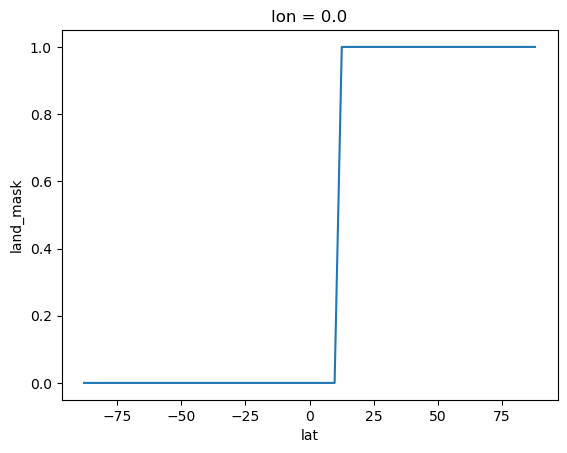

In [6]:
job_dir = os.path.join(os.path.dirname(os.environ['GFDL_DATA']), 'jobs')
land_file_name = os.path.join(job_dir, exp_dir, 'land.nc')
xr.load_dataset(land_file_name).land_mask.plot()